In [1]:
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import numpy as np

In [2]:
iterations = 5000
p_mu = 0.0
q_sigma = torch.tensor([1.0])

lr = 1e-3

log_Z = np.log(np.sqrt((2*np.pi)))

In [5]:
def train(num_samples, q_mu, lr):
    EUBOs = []
    ELBOs = []
    for i in range(iterations):
        proposal = Normal(q_mu, q_sigma)
        xs = proposal.sample((num_samples,))
        log_gammas = (-1.0 / 2.0) * ((xs - p_mu) ** 2)
        log_q = proposal.log_prob(xs)

        log_weights = log_gammas - log_q
        weights = torch.exp(log_weights - logsumexp(log_weights, dim=0)).detach()
        eubo = torch.mul(weights, log_weights).sum()
        elbo = log_weights.mean()
        gradient = q_mu
        q_mu = q_mu - lr * gradient
        EUBOs.append(eubo.item())
        ELBOs.append(elbo.item())
    return EUBOs, ELBOs

prior : 2.000000, samples : 100 (1s)
prior : 2.000000, samples : 1000 (1s)
prior : 2.000000, samples : 10000 (2s)
prior : 4.000000, samples : 100 (1s)
prior : 4.000000, samples : 1000 (1s)
prior : 4.000000, samples : 10000 (2s)
prior : 6.000000, samples : 100 (1s)
prior : 6.000000, samples : 1000 (1s)
prior : 6.000000, samples : 10000 (2s)
prior : 8.000000, samples : 100 (1s)
prior : 8.000000, samples : 1000 (1s)
prior : 8.000000, samples : 10000 (2s)
prior : 10.000000, samples : 100 (0s)
prior : 10.000000, samples : 1000 (1s)
prior : 10.000000, samples : 10000 (2s)


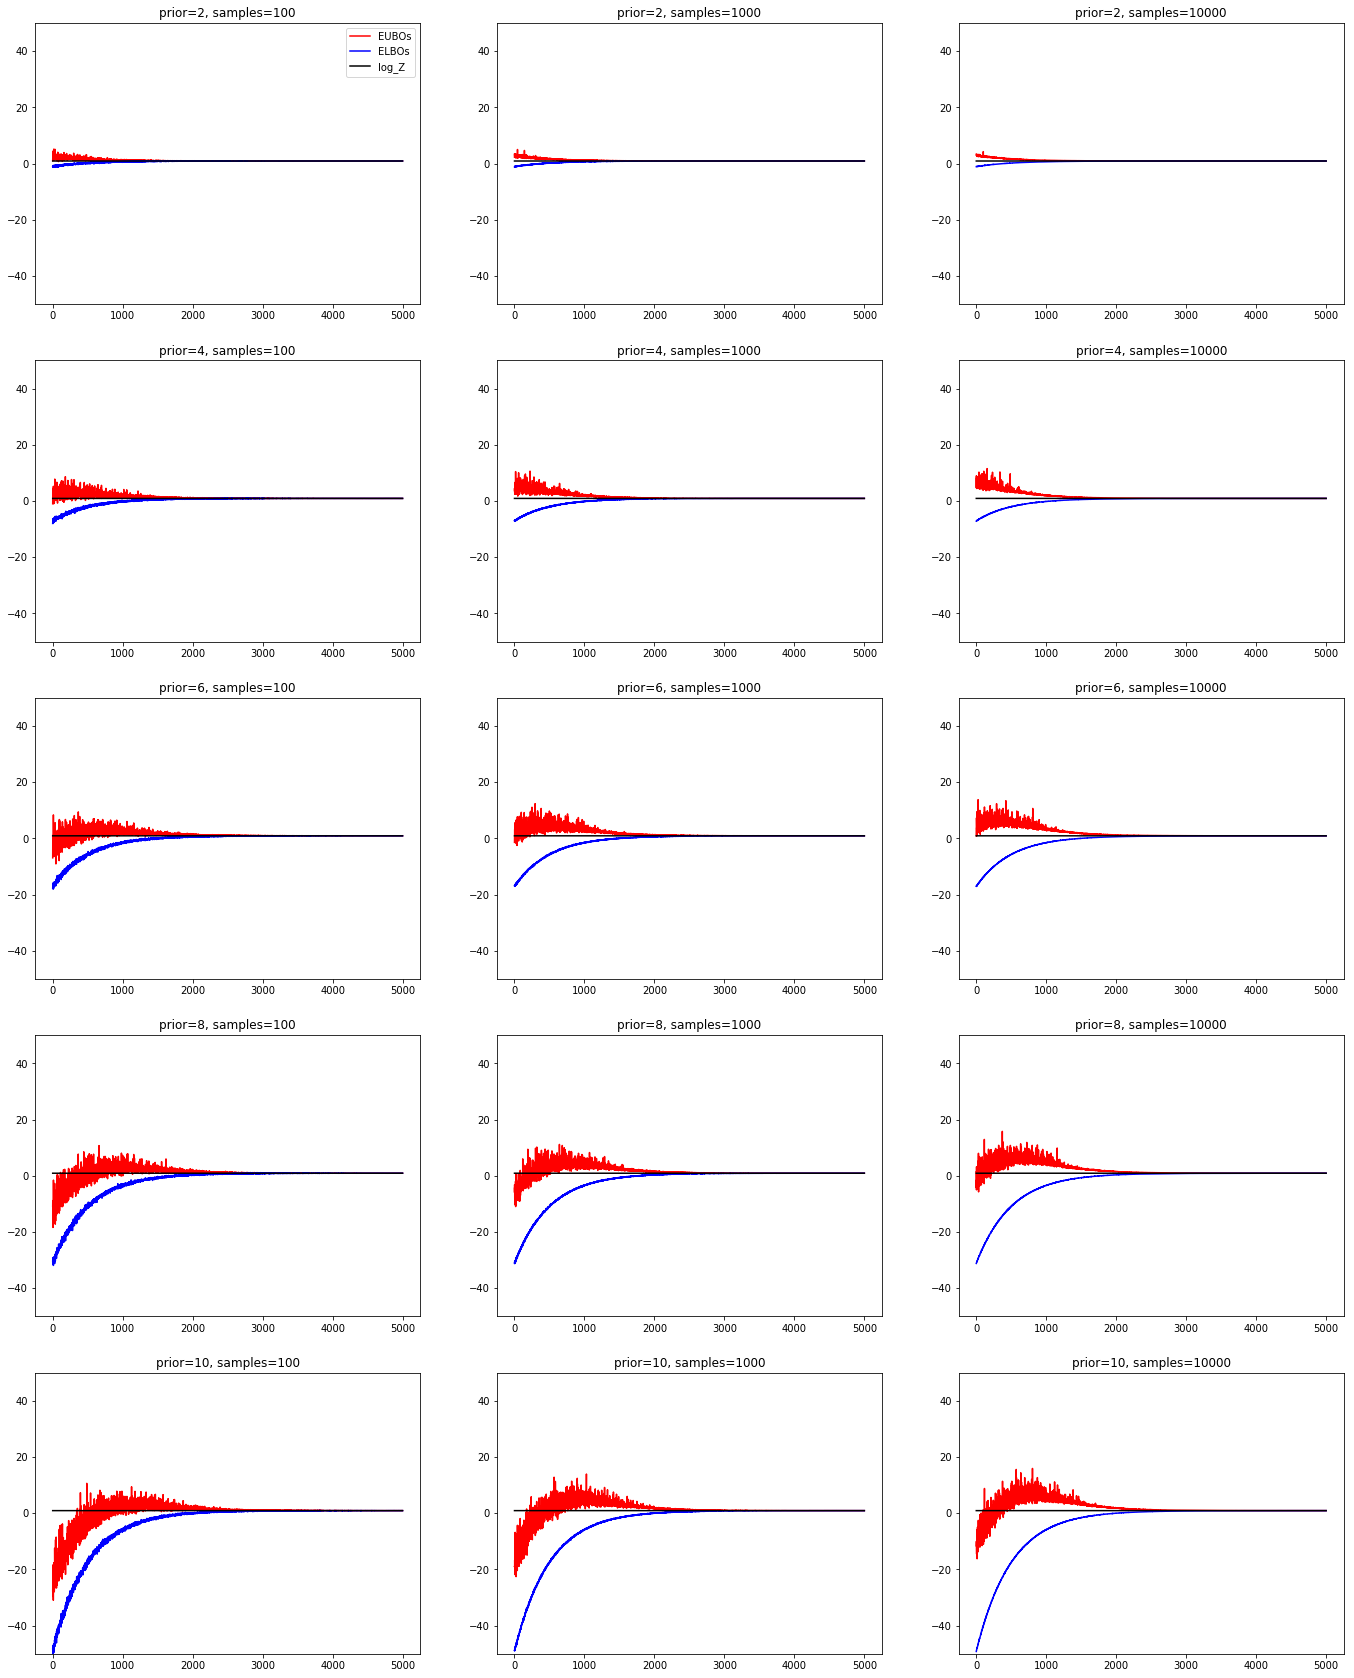

In [10]:
init_q = np.array([2, 4, 6, 8, 10])
NUM_SAMPLES = np.array([100, 1000, 10000])
# NUM_SAMPLES = np.array([10, 10, 10, 10, 10])
fig = plt.figure(figsize=(40, 30))

for i in range(5):
    for j in range(3):
        time_start = time.time()
        q_mu = torch.tensor([1.0], requires_grad=True) * init_q[i]
        EUBOs, ELBOs = train(NUM_SAMPLES[j], q_mu, lr)
        time_end = time.time()
        print('prior : %f, samples : %d (%ds)' % (init_q[i], NUM_SAMPLES[j], time_end - time_start))
        ax = fig.add_subplot(5, 5, i*5 + j + 1)
        ax.plot(EUBOs, 'r', label='EUBOs')
        ax.plot(ELBOs, 'b', label='ELBOs')
        ax.plot(np.ones(iterations) * log_Z, 'k', label='log_Z')
        ax.set_ylim([-50, 50])
        if i == 0 and j == 0:
            ax.legend()
        ax.set_title('prior=%d, samples=%d' % (init_q[i], NUM_SAMPLES[j]))
plt.savefig('results_single_gaussian_mixed.svg')

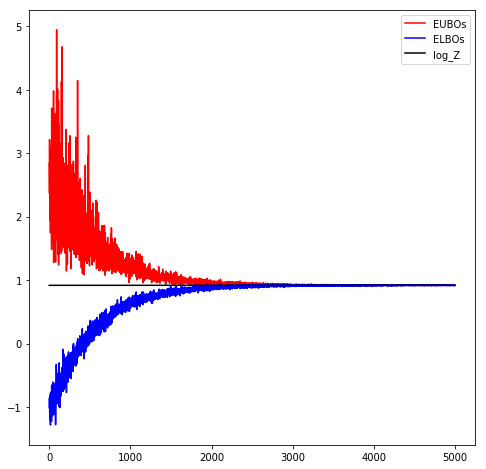

In [40]:
fig = plt.figure(figsize=(8,8))
# plt.plot(ELBOs)
ax = fig.add_subplot(111)
ax.plot(EUBOs, 'r', label='EUBOs')
ax.plot(ELBOs, 'b', label='ELBOs')
ax.plot(np.ones(iterations) * log_Z, 'k', label='log_Z')
ax.legend()
plt.savefig('rws-univariate-samples=%d-prior=2.png' % num_samples)

In [8]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>